<a href="https://colab.research.google.com/github/JanEggers-hr/ddj-python-kurs/blob/main/Schoko_Scraping_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Einfaches Scraping mit Python

Quelle: https://nathanaelvictorious.medium.com/simple-web-scraping-using-beautifulsoup-and-python-in-google-colab-4084be701851

Daten aus einer (statischen!) Webseite auslesen, in eine Tabelle schreiben - und als Grafik darstellen. 

Dies hier ist ein so genanntes Notebook, das Python-Code und Text mischt - und das man einfach an andere weitergeben kann: eine gute Methode, um Transparenz herzustellen.



```
# Als Code formatiert
```

# Die Aufgabe

[Diese Demo-Webseite](https://content.codecademy.com/courses/beautifulsoup/cacao/index.html) enthält Daten in einer statischen Tabelle: 
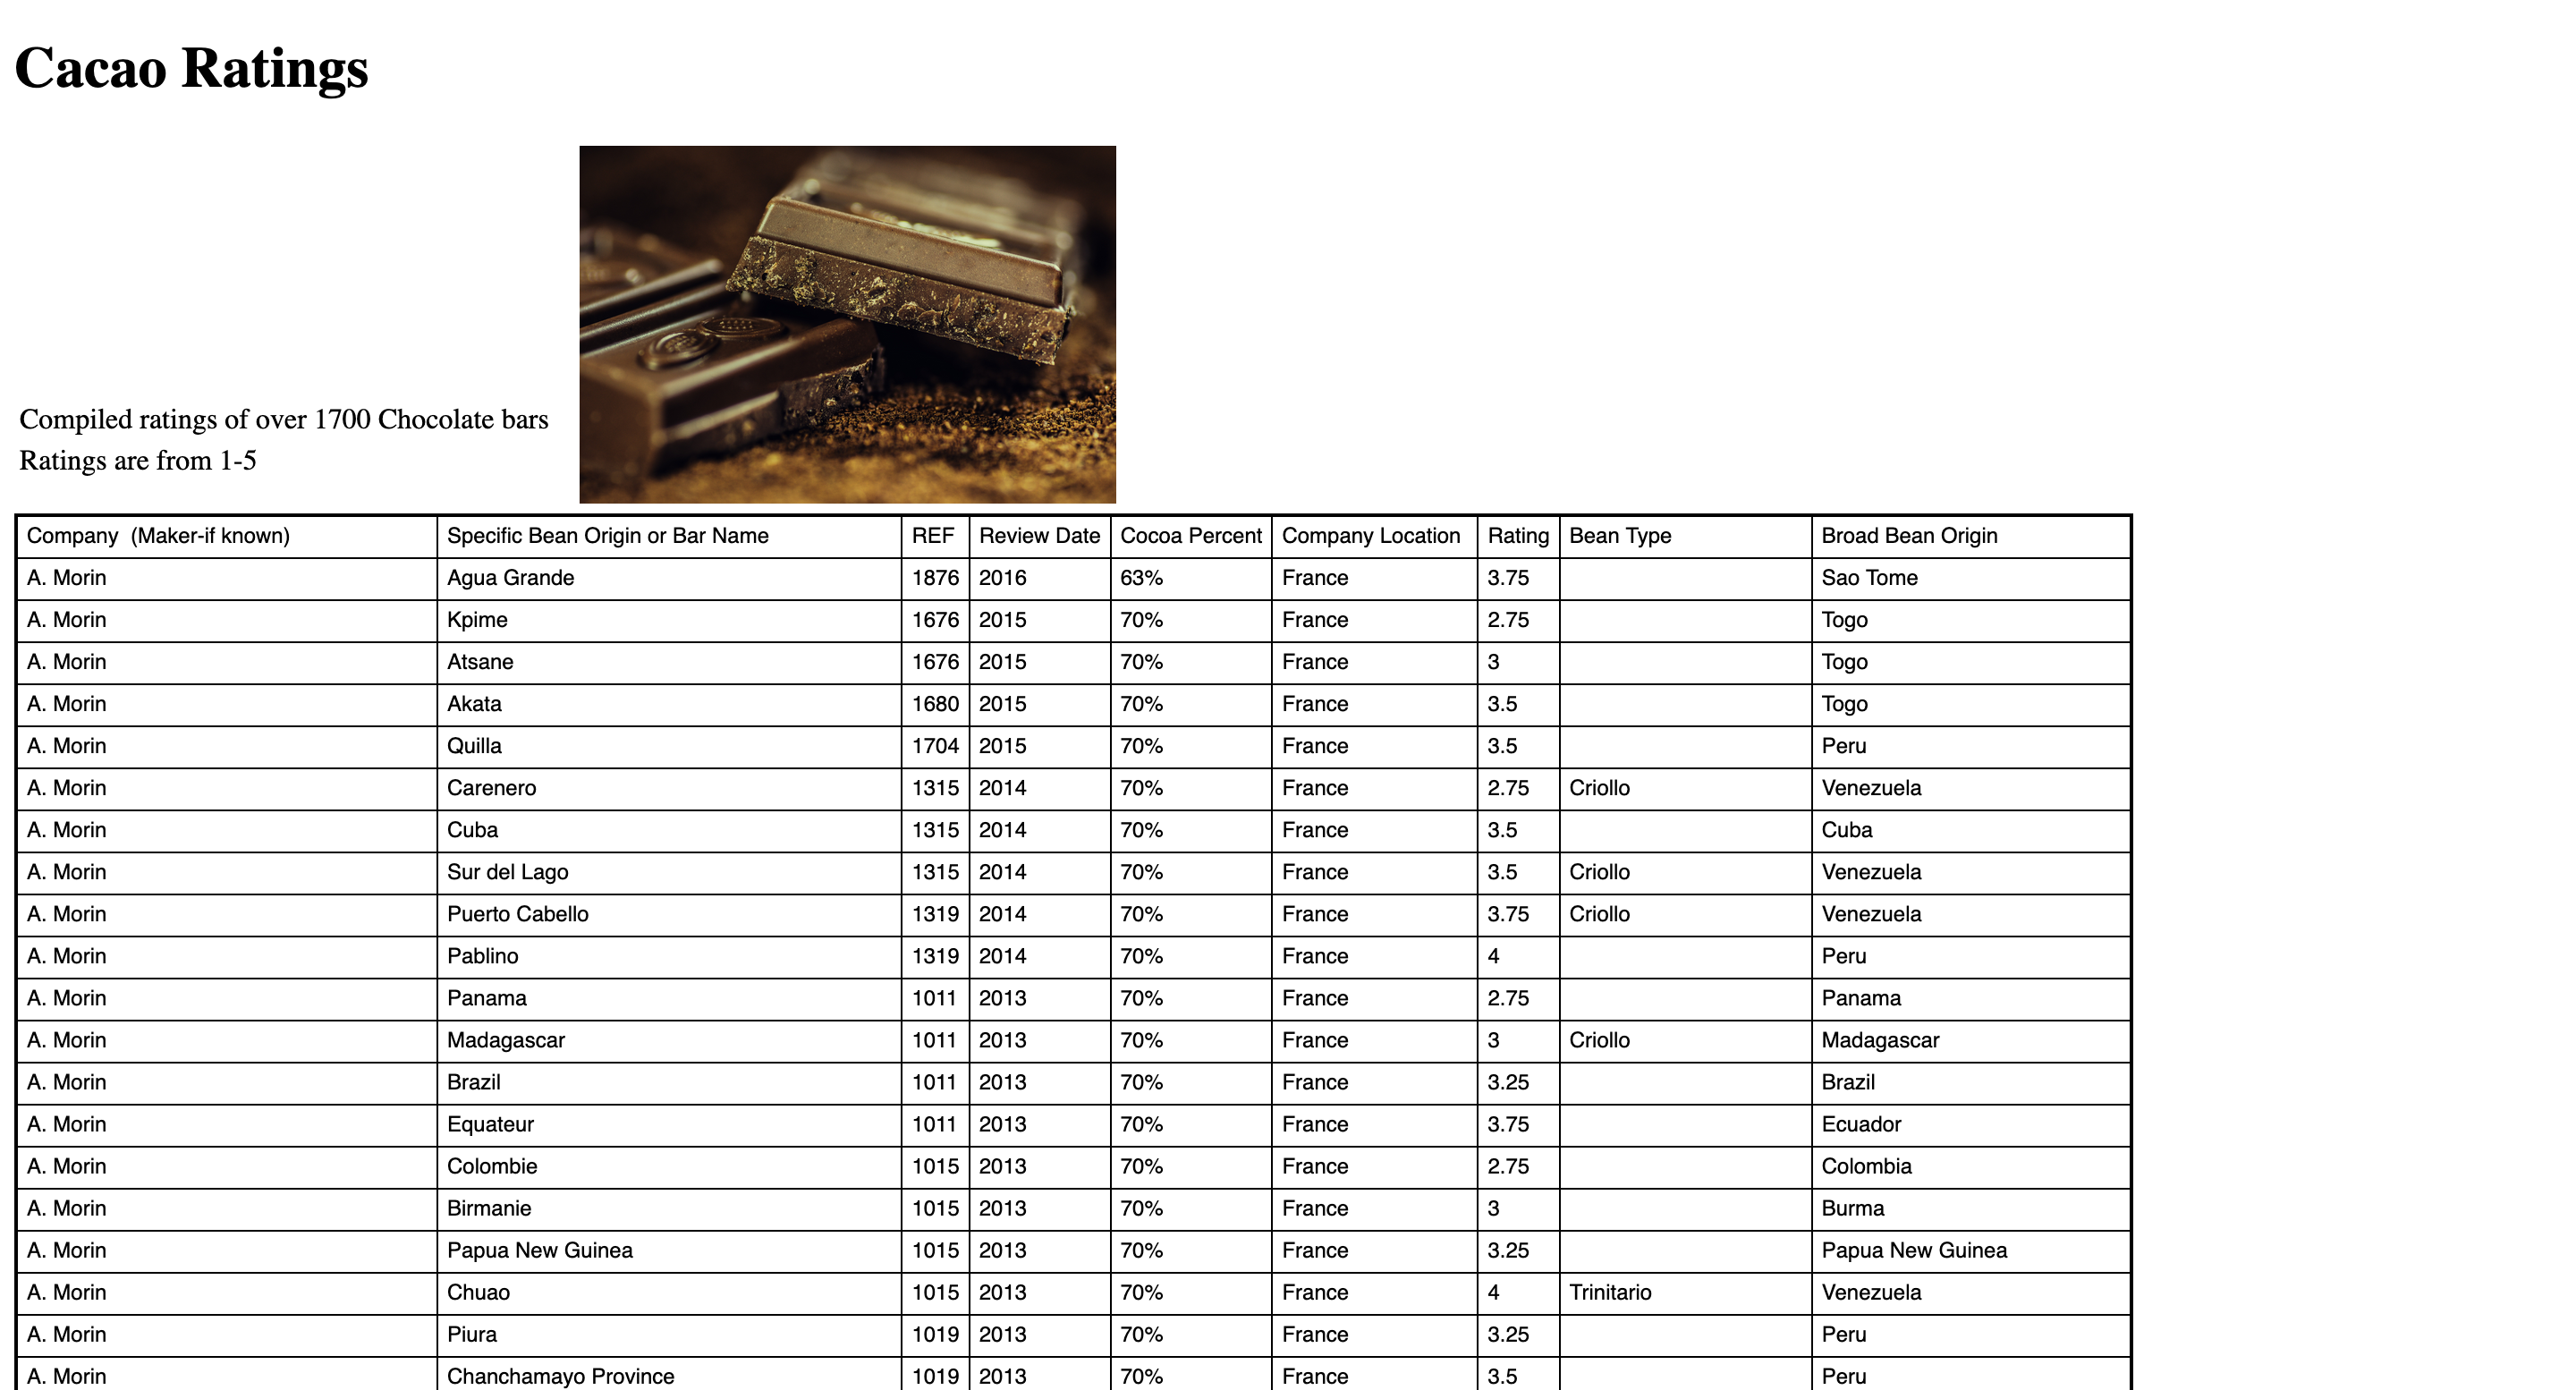

Der Text soll mit Python in eine Tabelle ausgelesen werden, um Kakao-Anteil und Bewertung gegenüber stellen zu können: Bedeutet ein höherer Anteil des teuren Kakaos wirklich eine bessere Bewertung?

## Intro: Lies dich ein!

Die Programmteile, die die Daten aus der Webseite lesen, holen wir aus so genannten **Bibliotheken**. Dort ist Programmcode hinterlegt, der bestimmte Aufgaben löst - und den wir als so genannte **Funktionen** aufrufen können: Kleine Unterprogramme, denen wir ihre Aufgabe in Form von **Parametern** übergeben - das sind die Daten, mit denen das Programm arbeiten soll. 

In [ ]:
#Bibliotheken importieren - die müssen allerdings installiert sein! 

from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Kleine Anmerkung: Oft meckert Python, dass es Bibliotheken ins Programm importieren soll, die gar nicht auf dem Computer sind. Dann müssen wir sie erst mit Hilfe eines Zusatzprogramms namens ```pip```
laden - ein so genannter Paketmanager, der die Bibliotheken aus dem Internet lädt und auf unserem Computer installiert. 

Wenn aber alles funktioniert hat, passiert beim Klick auf den "Run"-Knopf - einfach nichts. Also weiter zum nächsten Schritt: Die Webseite über die Web-Datendownload-Funktion requests laden, und über die Funktion BeautifulSoup aufschlüsseln. 

## Teil 1: Jäger und Sammler

Dieser Programmcode holt die Daten aus dem Netz und strukturiert sie - in so genannten Listen, also Variablen, die eine Vielzahl einzelner Datenwerte enthalten können. 

In [ ]:
#Hole den HTML-Code der Webseite und lies ihn in die Variable webpage
webpage = requests.get("https://content.codecademy.com/courses/beautifulsoup/cacao/index.html")

#Zeige an, welche Antwort die Funktion beim Auslesen der Website bekommen hat: 
#Code 200 bedeutet: "Alles in Ordnung"
webpage

<Response [200]>

In [ ]:
#Den HTML-Code der Webseite aus der Variable webpage aufschlüsseln
soup = BeautifulSoup(webpage.content, "html.parser")

#Die Bewertungen sind in Tabellenzellen der Klasse "Rating", 
#die Kakao-Anteile in Tabellenzellen der Klasse "CocoaPercent".
#Sammle diese Elemente jeweils in einer Listen-Variable. 
rating_column = soup.find_all(attrs={"class": "Rating"})
cocoa_percent_tags = soup.find_all(attrs={"class": "CocoaPercent"})

# Wie viele Datenzeilen?
len(rating_column)

1796

In [ ]:
#Wie sehen diese Listen aus? Python zeigt uns das an, wenn wir einfach den Variablen-Namen aufrufen. 
#Die Angaben in eckigen Klammern sagen dem Programm: Gib nur die ersten 10 Zeilen aus. 
rating_column[1:10]
type(rating_column)

bs4.element.ResultSet

In [ ]:
type(rating_column[1])
rating_column[1].get_text()

'3.75'

In [ ]:
cocoa_percent_tags[1:10]

[<td class="CocoaPercent">63%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>,
 <td class="CocoaPercent">70%</td>]

## Teil 2: Schwerter zu Pflugscharen, Zellen zu Daten



In [ ]:
#Wir legen zunächst zwei neue (leere) Listen an, in die wir die Daten umkopieren.
ratings = []
cocoa_percents = []

#Loops - Schleifen - lassen den Computer denselben Vorgang immer wieder mit neuen Daten wiederholen. So spart man Arbeit!
#Wiederhole es für alle Tabellenzellen, die wir in der Variable "rating_column" gespeichert haben: 
#Lies eine Fließkomma-Zahl aus dem Tabellen-Text, und hänge ihn an die Liste an. 
for x in rating_column[1:] :
  type(x)
  ratings.append(float(x.get_text()))

# Dasselbe für alle Zellen mit den Prozentwerten - das Prozentzeichen allerdings stört und muss entfernt werden. 
for x in cocoa_percent_tags[1:] :
  percent = float(x.get_text().strip('%'))
  cocoa_percents.append(percent)

#Jetzt fassen wir die Datenspalten in einem so genannten Dictionary - Wörterbuch - zusammen. 
data = {"Rating": ratings, "CocoaPercentage": cocoa_percents}

In [ ]:
type(data)

dict

Jetzt kommt was Neues: eine Tabelle. 

Tabellen sind - anders als bei R - kein Datentyp, der in Python fest eingebaut ist. Viele Programme arbeiten deshalb mit zwei Standard-Bibliotheken, die Tabellen und nützliche Funktionen für den Umgang mit ihnen nachrüsten - Numpy und Pandas. 

Diese Codezeile erzeugt aus unserem Dictionary eine pandas-Tabelle. 

In [ ]:
df = pd.DataFrame.from_dict(data)
df.head(10)

,Rating,CocoaPercentage
0,3.75,63.0
1,2.75,70.0
2,3.00,70.0
3,3.50,70.0
4,3.50,70.0
5,2.75,70.0
6,3.50,70.0
7,3.50,70.0
8,3.75,70.0
9,4.00,70.0


In [ ]:
liste1 = ["a","b","c","d","e"]
liste2 = [1, 2, 5, 6, 2]
liste2[3]
d = {"Spalte1":liste1, "Spalte2": liste2}
d

{'Spalte1': ['a', 'b', 'c', 'd', 'e'], 'Spalte2': [1, 2, 5, 6, 2]}

## Teil 3: Finde das Muster!

Die Datenaufbereitung ist abgeschlossen, jetzt kommt die Datenanalyse und -ausgabe: Wir versuchen, in den Daten eine Regressions-Linie zu finden - und alles als Scatterplot auszugeben. 

In [ ]:
#Numpy-Funktion für eine einfache Regression der Daten
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)

#Baue eine Funktion, die die Regressions-Gerade erzeugt
line_function = np.poly1d(z)


Jetzt können wir die Daten mit der Python-Bibliothek ```mathplotlib``` ausgeben. (Welche Funktionen die schönsten Daten ausgeben, ist Teil eines regelrechten Krieges und letztlich eine Glaubensfrage - das hier ist einfach und funktioniert.) 


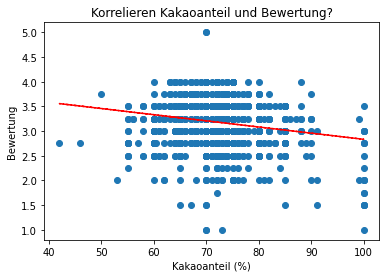

In [ ]:
plt.scatter(df.CocoaPercentage, df.Rating)
plt.title('Korrelieren Kakaoanteil und Bewertung?')
plt.xlabel('Kakaoanteil (%)')
plt.ylabel('Bewertung')
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.show()